# 1.Préparation et Prétraitement du Texte

In [ ]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab import drive
drive.mount('/content/drive')
import seaborn as sns
from nltk.stem import WordNetLemmatizer  # Import the lemmatizer
from nltk.corpus import wordnet  # Required for lemmatizer
from nltk.corpus import stopwords  # Import the stopwords class

In [ ]:
#import data
file_path = '/content/drive/MyDrive/DATA/DATA_POLICY.xlsx'

data=pd.read_excel(file_path)

print(data.tail(5))

                   Category                                            Content
21954  Science & Technology  Red pills and dog whistles: It is more than ‘j...
21955  Science & Technology  Facebook blocks terminally ill Frenchman from ...
21956  Science & Technology  JEDI wins: Pentagon review finds Microsoft pit...
21957  Science & Technology  Can Facebook stop US election misinformation?,...
21958  Science & Technology  Facebook must walk the talk on Myanmar,""The s...


##EDA:

In [ ]:
#understand data
print(data.info())  # Informations sur les colonnes et les types de données

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21959 entries, 0 to 21958
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  21959 non-null  object
 1   Content   21959 non-null  object
dtypes: object(2)
memory usage: 343.2+ KB
None


In [ ]:


print(data['Category'].value_counts())  # Distribution des classes

Category
Coronavirus             5008
Economy                 4992
Europe                  4501
Africa                  3305
Sports                  2342
Science & Technology     523
Climate Crisis           502
Middle East              501
Asia                     271
Opinion                   14
Name: count, dtype: int64


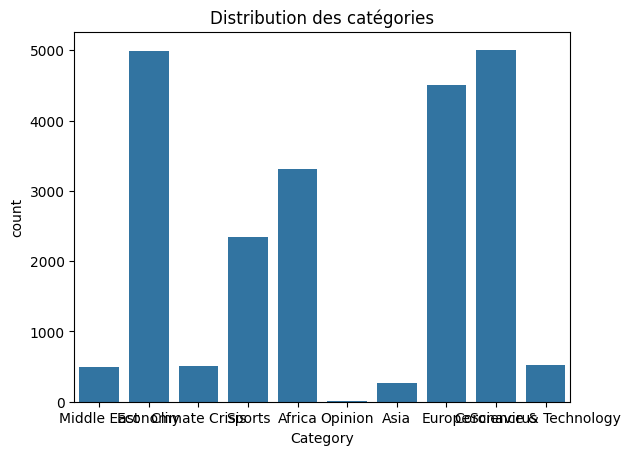

In [ ]:
#Analysing Target "Category"
sns.countplot(x='Category', data=data)
plt.title('Distribution des catégories')
plt.show()

In [ ]:
#Analysing Content
# Longueur des textes (en mots et en caractères)
data['text_length_words'] = data['Content'].apply(lambda x: len(x.split()))
data['text_length_chars'] = data['Content'].apply(len)


In [ ]:
# Statistiques descriptives
print(data['text_length_words'].describe())


count    21959.000000
mean       581.821212
std        391.806855
min          3.000000
25%        349.500000
50%        501.000000
75%        712.000000
max       5102.000000
Name: text_length_words, dtype: float64


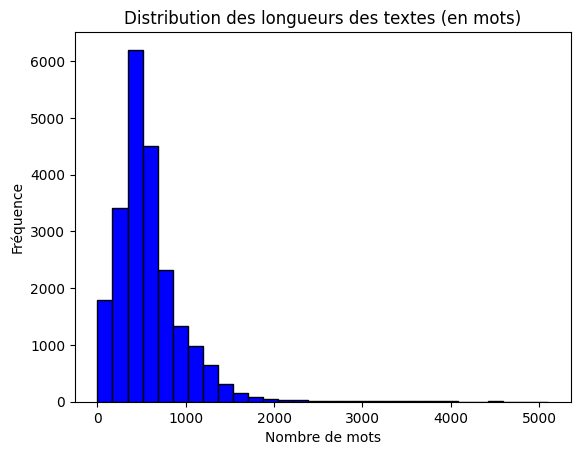

In [ ]:
# Visualisation
plt.hist(data['text_length_words'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution des longueurs des textes (en mots)')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')
plt.show()